# Generate simulated data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

from scipy.optimize import minimize
import scipy.stats

In [2]:
# shifted and scaled sigmoid function
def sigmoid(x, a=0, b=1.):
    return 1 / (1 + (np.exp(-1 * (x - a) / b)))

In [3]:
N = 10000
P = 5

rs = np.random.RandomState(1978)

X = rs.randn(N, P)
w = rs.randn(P)

y_prob = sigmoid(X @ w)
y = (rs.rand(N) < y_prob).astype(int)

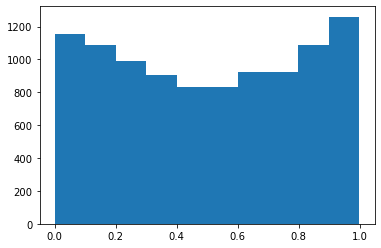

In [4]:
plt.hist(y_prob)
plt.show()

In [5]:
t = (rs.randn(N) + 5 * y) / 20 + .1

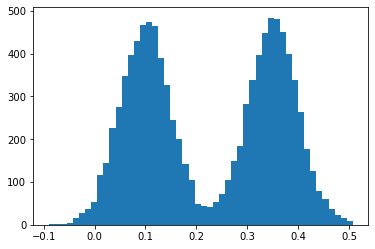

In [6]:
plt.hist(t, bins=50)
plt.show()

# Set initial parameters

In [7]:
theta0 = np.zeros(P + 1)
cutpoint0 = -1.2

# Scipy implementation

In [8]:
def pred_value(x, theta):
    return sigmoid(x @ theta)

In [9]:
def loss(params, x, t):
    
    theta = params[:-1]
    cutpoint_logit = params[-1]

    cutpoint = sigmoid(cutpoint_logit)
    t_disc = sigmoid(t, cutpoint, 1e-3)
    
    x1 = np.concatenate([x, np.ones((len(x), 1))], axis=1)
    p_hat = pred_value(x1, np.array(theta))
    
    n = len(t)
    likelihood = (-1/n) * np.sum( t_disc * np.log(p_hat) + (1-t_disc)*np.log(1-p_hat) )
    
    # start with an informative beta prior on cut point
    prior = -1 * scipy.stats.beta.logpdf(cutpoint, 1.5, 1.5)

#     prior = -1 * scipy.stats.beta.logpdf(cutpoint, 2, 2)

    #prior = 0.
    
    print('Likelihood = %.5e | Prior = %.5e' % (likelihood, prior))
    
    return likelihood + prior

In [10]:
# minimize with scipy minimize
def fit(X, t, theta, cutpoint_logit0):
#     opt_weights = minimize(
#         fun = loss,
#         x0 = (*theta, cutpoint_logit0),
#         args = (X, t),
#         method = "Nelder-Mead"
#     )
    opt_weights = minimize(
        fun = loss,
        x0 = (*theta, cutpoint_logit0),
        args = (X, t)
    )
    return opt_weights

In [11]:
# loss of intial guess
loss((*theta0, cutpoint0), X, t)

Likelihood = 6.93147e-01 | Prior = -7.14292e-02


0.6217179920675406

In [12]:
params = fit(X, t, theta0, cutpoint0)

Likelihood = 6.93147e-01 | Prior = -7.14292e-02
Likelihood = 6.93147e-01 | Prior = -7.14292e-02
Likelihood = 6.93147e-01 | Prior = -7.14292e-02
Likelihood = 6.93147e-01 | Prior = -7.14292e-02
Likelihood = 6.93147e-01 | Prior = -7.14292e-02
Likelihood = 6.93147e-01 | Prior = -7.14292e-02
Likelihood = 6.93147e-01 | Prior = -7.14292e-02
Likelihood = 6.93147e-01 | Prior = -7.14292e-02
Likelihood = 6.25116e-01 | Prior = -1.36817e-01
Likelihood = 6.25116e-01 | Prior = -1.36817e-01
Likelihood = 6.25116e-01 | Prior = -1.36817e-01
Likelihood = 6.25116e-01 | Prior = -1.36817e-01
Likelihood = 6.25116e-01 | Prior = -1.36817e-01
Likelihood = 6.25116e-01 | Prior = -1.36817e-01
Likelihood = 6.25116e-01 | Prior = -1.36817e-01
Likelihood = 6.25116e-01 | Prior = -1.36817e-01
Likelihood = 6.95210e-01 | Prior = -2.20777e-01
Likelihood = 6.95210e-01 | Prior = -2.20777e-01
Likelihood = 6.95210e-01 | Prior = -2.20777e-01
Likelihood = 6.95210e-01 | Prior = -2.20777e-01
Likelihood = 6.95210e-01 | Prior = -2.20

<ipython-input-2-7899cc5202f7>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + (np.exp(-1 * (x - a) / b)))


Likelihood = 3.91914e-03 | Prior = -2.41195e-01
Likelihood = 3.91914e-03 | Prior = -2.41195e-01
Likelihood = 3.91914e-03 | Prior = -2.41195e-01
Likelihood = 3.91914e-03 | Prior = -2.41195e-01
Likelihood = 2.14168e-03 | Prior = -2.41167e-01
Likelihood = 2.14168e-03 | Prior = -2.41167e-01
Likelihood = 2.14168e-03 | Prior = -2.41167e-01
Likelihood = 2.14168e-03 | Prior = -2.41167e-01
Likelihood = 2.14168e-03 | Prior = -2.41167e-01
Likelihood = 2.14168e-03 | Prior = -2.41167e-01
Likelihood = 2.14168e-03 | Prior = -2.41167e-01
Likelihood = 2.14168e-03 | Prior = -2.41167e-01
Likelihood = 1.10657e-03 | Prior = -2.41203e-01
Likelihood = 1.10657e-03 | Prior = -2.41203e-01
Likelihood = 1.10657e-03 | Prior = -2.41203e-01
Likelihood = 1.10657e-03 | Prior = -2.41203e-01
Likelihood = 1.10657e-03 | Prior = -2.41203e-01
Likelihood = 1.10657e-03 | Prior = -2.41203e-01
Likelihood = 1.10657e-03 | Prior = -2.41203e-01
Likelihood = 1.10657e-03 | Prior = -2.41203e-01
Likelihood = 5.85864e-04 | Prior = -2.41

In [13]:
print(np.stack([params.x[:-2], w]).T)

[[ 0.26271661 -0.43486986]
 [-1.07775475  1.62069693]
 [-0.06976151  0.11865208]
 [ 0.3871457  -0.66857646]
 [-0.23421618  0.53128924]]


In [14]:
sigmoid(params.x[-1])

0.5115161071325429

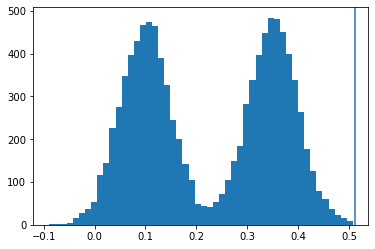

In [15]:
plt.hist(t, bins=50)
plt.axvline(sigmoid(params.x[-1]))
plt.show()

# Pytorch implementation

In [16]:
import torch
import torch.optim as optim

In [17]:
# shifted and scaled sigmoid function
def sigmoid_torch(x, a=0, b=1.):
    return 1 / (1 + (torch.exp(-1 * (x - a) / b)))

In [18]:
def pred_value_torch(x, theta):
    prod = torch.matmul(x,theta)
    return sigmoid_torch(prod)

In [19]:
def loss_torch(params, x, t):
    
    theta = params[:-1][0]
    cutpoint_logit = params[-1]

    cutpoint = sigmoid_torch(cutpoint_logit)
    t_disc = sigmoid_torch(t, cutpoint, 1e-3)
    
    x1 = torch.cat([x, torch.ones((len(x), 1))], axis=1)
    
    p_hat = pred_value_torch(x1, theta)
    
    n = len(t)
    likelihood = (-1/n) * torch.sum( t_disc * torch.log(p_hat) + (1-t_disc)*torch.log(1-p_hat) )
    
    # start with an informative beta prior on cut point
    
    prior = -1 * scipy.stats.beta.logpdf(cutpoint.detach().numpy(), 1.5, 1.5)

    print('Likelihood = %.7e | Prior = %.7e' % (likelihood, prior))
    
    return likelihood + prior

In [20]:
# https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html
# requires requires_grad = True
theta0_torch = torch.tensor(theta0, requires_grad=True)
cutpoint0_torch = torch.tensor(cutpoint0, requires_grad=True)
X_torch = torch.tensor(X)
t_torch = torch.tensor(t)

In [21]:
loss_torch((theta0_torch, cutpoint0_torch), X_torch, t_torch)

Likelihood = 6.9314718e-01 | Prior = -7.1429192e-02


tensor(0.6217, dtype=torch.float64, grad_fn=<AddBackward0>)

### matches scipy loss!

In [22]:
# then optimize
# https://pytorch.org/docs/stable/optim.html
optimizer = optim.Adam([theta0_torch, cutpoint0_torch], lr=0.0001)

loss_diff = 1000
loss_curr = 1000
loss_prev = 0 

iteration_num = 1

tolerance = 1e-7

while loss_diff > tolerance:
    
    iteration_num += 1
    loss_prev = loss_curr
    
    optimizer.zero_grad()
    loss_curr = loss = loss_torch((theta0_torch, cutpoint0_torch), X_torch, t_torch)
    loss.backward()
    optimizer.step()
    
    loss_diff = torch.norm(loss_curr - loss_prev) / (1 + torch.norm(loss_curr) )

    
print(iteration_num)

Likelihood = 6.9314718e-01 | Prior = -7.1429192e-02
Likelihood = 6.9309530e-01 | Prior = -7.1429192e-02
Likelihood = 6.9304344e-01 | Prior = -7.1449120e-02
Likelihood = 6.9299159e-01 | Prior = -7.1471340e-02
Likelihood = 6.9293975e-01 | Prior = -7.1494749e-02
Likelihood = 6.9288793e-01 | Prior = -7.1518920e-02
Likelihood = 6.9283613e-01 | Prior = -7.1543809e-02
Likelihood = 6.9278434e-01 | Prior = -7.1569233e-02
Likelihood = 6.9273256e-01 | Prior = -7.1595195e-02
Likelihood = 6.9268080e-01 | Prior = -7.1621602e-02
Likelihood = 6.9262905e-01 | Prior = -7.1648502e-02
Likelihood = 6.9257732e-01 | Prior = -7.1675802e-02
Likelihood = 6.9252561e-01 | Prior = -7.1703593e-02
Likelihood = 6.9247391e-01 | Prior = -7.1731740e-02
Likelihood = 6.9242223e-01 | Prior = -7.1760310e-02
Likelihood = 6.9237057e-01 | Prior = -7.1789236e-02
Likelihood = 6.9231892e-01 | Prior = -7.1818562e-02
Likelihood = 6.9226729e-01 | Prior = -7.1848222e-02
Likelihood = 6.9221568e-01 | Prior = -7.1878259e-02
Likelihood =

Likelihood = 6.8390930e-01 | Prior = -7.7432490e-02
Likelihood = 6.8386084e-01 | Prior = -7.7456568e-02
Likelihood = 6.8381240e-01 | Prior = -7.7480513e-02
Likelihood = 6.8376398e-01 | Prior = -7.7504214e-02
Likelihood = 6.8371557e-01 | Prior = -7.7527759e-02
Likelihood = 6.8366719e-01 | Prior = -7.7551039e-02
Likelihood = 6.8361882e-01 | Prior = -7.7574142e-02
Likelihood = 6.8357047e-01 | Prior = -7.7597002e-02
Likelihood = 6.8352214e-01 | Prior = -7.7619684e-02
Likelihood = 6.8347383e-01 | Prior = -7.7642145e-02
Likelihood = 6.8342554e-01 | Prior = -7.7664473e-02
Likelihood = 6.8337726e-01 | Prior = -7.7686536e-02
Likelihood = 6.8332901e-01 | Prior = -7.7708378e-02
Likelihood = 6.8328077e-01 | Prior = -7.7730022e-02
Likelihood = 6.8323254e-01 | Prior = -7.7751488e-02
Likelihood = 6.8318434e-01 | Prior = -7.7772734e-02
Likelihood = 6.8313616e-01 | Prior = -7.7793759e-02
Likelihood = 6.8308799e-01 | Prior = -7.7814563e-02
Likelihood = 6.8303984e-01 | Prior = -7.7835213e-02
Likelihood =

Likelihood = 6.7609872e-01 | Prior = -7.8140597e-02
Likelihood = 6.7605297e-01 | Prior = -7.8119911e-02
Likelihood = 6.7600724e-01 | Prior = -7.8098918e-02
Likelihood = 6.7596152e-01 | Prior = -7.8077638e-02
Likelihood = 6.7591581e-01 | Prior = -7.8056051e-02
Likelihood = 6.7587012e-01 | Prior = -7.8034200e-02
Likelihood = 6.7582444e-01 | Prior = -7.8012085e-02
Likelihood = 6.7577877e-01 | Prior = -7.7989662e-02
Likelihood = 6.7573312e-01 | Prior = -7.7966952e-02
Likelihood = 6.7568748e-01 | Prior = -7.7944022e-02
Likelihood = 6.7564186e-01 | Prior = -7.7920762e-02
Likelihood = 6.7559625e-01 | Prior = -7.7897281e-02
Likelihood = 6.7555065e-01 | Prior = -7.7873491e-02
Likelihood = 6.7550507e-01 | Prior = -7.7849502e-02
Likelihood = 6.7545950e-01 | Prior = -7.7825249e-02
Likelihood = 6.7541395e-01 | Prior = -7.7800796e-02
Likelihood = 6.7536841e-01 | Prior = -7.7776078e-02
Likelihood = 6.7532288e-01 | Prior = -7.7751138e-02
Likelihood = 6.7527737e-01 | Prior = -7.7725956e-02
Likelihood =

Likelihood = 6.6769941e-01 | Prior = -7.3888664e-02
Likelihood = 6.6765629e-01 | Prior = -7.3879387e-02
Likelihood = 6.6761319e-01 | Prior = -7.3870288e-02
Likelihood = 6.6757010e-01 | Prior = -7.3861367e-02
Likelihood = 6.6752702e-01 | Prior = -7.3852579e-02
Likelihood = 6.6748395e-01 | Prior = -7.3843946e-02
Likelihood = 6.6744090e-01 | Prior = -7.3835446e-02
Likelihood = 6.6739786e-01 | Prior = -7.3827124e-02
Likelihood = 6.6735484e-01 | Prior = -7.3818957e-02
Likelihood = 6.6731183e-01 | Prior = -7.3810879e-02
Likelihood = 6.6726883e-01 | Prior = -7.3802957e-02
Likelihood = 6.6722585e-01 | Prior = -7.3795212e-02
Likelihood = 6.6718288e-01 | Prior = -7.3787556e-02
Likelihood = 6.6713992e-01 | Prior = -7.3780056e-02
Likelihood = 6.6709698e-01 | Prior = -7.3772667e-02
Likelihood = 6.6705405e-01 | Prior = -7.3765433e-02
Likelihood = 6.6701113e-01 | Prior = -7.3758266e-02
Likelihood = 6.6696823e-01 | Prior = -7.3751276e-02
Likelihood = 6.6692534e-01 | Prior = -7.3744353e-02
Likelihood =

Likelihood = 6.6076328e-01 | Prior = -7.3253417e-02
Likelihood = 6.6072231e-01 | Prior = -7.3251565e-02
Likelihood = 6.6068135e-01 | Prior = -7.3249714e-02
Likelihood = 6.6064039e-01 | Prior = -7.3247884e-02
Likelihood = 6.6059946e-01 | Prior = -7.3246077e-02
Likelihood = 6.6055853e-01 | Prior = -7.3244248e-02
Likelihood = 6.6051762e-01 | Prior = -7.3242440e-02
Likelihood = 6.6047672e-01 | Prior = -7.3240656e-02
Likelihood = 6.6043583e-01 | Prior = -7.3238893e-02
Likelihood = 6.6039495e-01 | Prior = -7.3237108e-02
Likelihood = 6.6035409e-01 | Prior = -7.3235323e-02
Likelihood = 6.6031323e-01 | Prior = -7.3233583e-02
Likelihood = 6.6027239e-01 | Prior = -7.3231843e-02
Likelihood = 6.6023157e-01 | Prior = -7.3230080e-02
Likelihood = 6.6019075e-01 | Prior = -7.3228362e-02
Likelihood = 6.6014995e-01 | Prior = -7.3226622e-02
Likelihood = 6.6010916e-01 | Prior = -7.3224881e-02
Likelihood = 6.6006838e-01 | Prior = -7.3223186e-02
Likelihood = 6.6002762e-01 | Prior = -7.3221490e-02
Likelihood =

Likelihood = 6.5311623e-01 | Prior = -7.3011249e-02
Likelihood = 6.5307753e-01 | Prior = -7.3010400e-02
Likelihood = 6.5303883e-01 | Prior = -7.3009507e-02
Likelihood = 6.5300015e-01 | Prior = -7.3008703e-02
Likelihood = 6.5296148e-01 | Prior = -7.3007854e-02
Likelihood = 6.5292282e-01 | Prior = -7.3007028e-02
Likelihood = 6.5288417e-01 | Prior = -7.3006224e-02
Likelihood = 6.5284553e-01 | Prior = -7.3005375e-02
Likelihood = 6.5280691e-01 | Prior = -7.3004526e-02
Likelihood = 6.5276829e-01 | Prior = -7.3003722e-02
Likelihood = 6.5272969e-01 | Prior = -7.3002896e-02
Likelihood = 6.5269110e-01 | Prior = -7.3002047e-02
Likelihood = 6.5265252e-01 | Prior = -7.3001199e-02
Likelihood = 6.5261395e-01 | Prior = -7.3000439e-02
Likelihood = 6.5257539e-01 | Prior = -7.2999657e-02
Likelihood = 6.5253684e-01 | Prior = -7.2998853e-02
Likelihood = 6.5249830e-01 | Prior = -7.2998027e-02
Likelihood = 6.5245978e-01 | Prior = -7.2997268e-02
Likelihood = 6.5242127e-01 | Prior = -7.2996441e-02
Likelihood =

Likelihood = 6.4673161e-01 | Prior = -7.2901831e-02
Likelihood = 6.4669474e-01 | Prior = -7.2901362e-02
Likelihood = 6.4665789e-01 | Prior = -7.2900893e-02
Likelihood = 6.4662105e-01 | Prior = -7.2900401e-02
Likelihood = 6.4658422e-01 | Prior = -7.2899887e-02
Likelihood = 6.4654739e-01 | Prior = -7.2899418e-02
Likelihood = 6.4651058e-01 | Prior = -7.2898971e-02
Likelihood = 6.4647378e-01 | Prior = -7.2898502e-02
Likelihood = 6.4643699e-01 | Prior = -7.2897988e-02
Likelihood = 6.4640021e-01 | Prior = -7.2897496e-02
Likelihood = 6.4636344e-01 | Prior = -7.2897027e-02
Likelihood = 6.4632668e-01 | Prior = -7.2896558e-02
Likelihood = 6.4628994e-01 | Prior = -7.2896111e-02
Likelihood = 6.4625320e-01 | Prior = -7.2895597e-02
Likelihood = 6.4621647e-01 | Prior = -7.2895127e-02
Likelihood = 6.4617975e-01 | Prior = -7.2894636e-02
Likelihood = 6.4614305e-01 | Prior = -7.2894167e-02
Likelihood = 6.4610635e-01 | Prior = -7.2893697e-02
Likelihood = 6.4606967e-01 | Prior = -7.2893206e-02
Likelihood =

Likelihood = 6.4022677e-01 | Prior = -7.2833602e-02
Likelihood = 6.4019174e-01 | Prior = -7.2833311e-02
Likelihood = 6.4015673e-01 | Prior = -7.2833043e-02
Likelihood = 6.4012173e-01 | Prior = -7.2832752e-02
Likelihood = 6.4008673e-01 | Prior = -7.2832439e-02
Likelihood = 6.4005175e-01 | Prior = -7.2832171e-02
Likelihood = 6.4001677e-01 | Prior = -7.2831881e-02
Likelihood = 6.3998181e-01 | Prior = -7.2831590e-02
Likelihood = 6.3994685e-01 | Prior = -7.2831322e-02
Likelihood = 6.3991191e-01 | Prior = -7.2831031e-02
Likelihood = 6.3987697e-01 | Prior = -7.2830741e-02
Likelihood = 6.3984204e-01 | Prior = -7.2830428e-02
Likelihood = 6.3980713e-01 | Prior = -7.2830160e-02
Likelihood = 6.3977222e-01 | Prior = -7.2829891e-02
Likelihood = 6.3973733e-01 | Prior = -7.2829578e-02
Likelihood = 6.3970244e-01 | Prior = -7.2829266e-02
Likelihood = 6.3966756e-01 | Prior = -7.2829042e-02
Likelihood = 6.3963270e-01 | Prior = -7.2828729e-02
Likelihood = 6.3959784e-01 | Prior = -7.2828416e-02
Likelihood =

Likelihood = 6.3474555e-01 | Prior = -7.2795780e-02
Likelihood = 6.3471205e-01 | Prior = -7.2795578e-02
Likelihood = 6.3467856e-01 | Prior = -7.2795377e-02
Likelihood = 6.3464508e-01 | Prior = -7.2795198e-02
Likelihood = 6.3461162e-01 | Prior = -7.2794997e-02
Likelihood = 6.3457816e-01 | Prior = -7.2794796e-02
Likelihood = 6.3454471e-01 | Prior = -7.2794617e-02
Likelihood = 6.3451127e-01 | Prior = -7.2794416e-02
Likelihood = 6.3447783e-01 | Prior = -7.2794215e-02
Likelihood = 6.3444441e-01 | Prior = -7.2794036e-02
Likelihood = 6.3441100e-01 | Prior = -7.2793879e-02
Likelihood = 6.3437759e-01 | Prior = -7.2793656e-02
Likelihood = 6.3434420e-01 | Prior = -7.2793499e-02
Likelihood = 6.3431081e-01 | Prior = -7.2793253e-02
Likelihood = 6.3427744e-01 | Prior = -7.2793097e-02
Likelihood = 6.3424407e-01 | Prior = -7.2792873e-02
Likelihood = 6.3421071e-01 | Prior = -7.2792717e-02
Likelihood = 6.3417736e-01 | Prior = -7.2792493e-02
Likelihood = 6.3414403e-01 | Prior = -7.2792337e-02
Likelihood =

Likelihood = 6.2867133e-01 | Prior = -7.2766671e-02
Likelihood = 6.2863950e-01 | Prior = -7.2766537e-02
Likelihood = 6.2860768e-01 | Prior = -7.2766403e-02
Likelihood = 6.2857587e-01 | Prior = -7.2766291e-02
Likelihood = 6.2854407e-01 | Prior = -7.2766134e-02
Likelihood = 6.2851228e-01 | Prior = -7.2766022e-02
Likelihood = 6.2848050e-01 | Prior = -7.2765911e-02
Likelihood = 6.2844872e-01 | Prior = -7.2765754e-02
Likelihood = 6.2841695e-01 | Prior = -7.2765687e-02
Likelihood = 6.2838520e-01 | Prior = -7.2765531e-02
Likelihood = 6.2835345e-01 | Prior = -7.2765374e-02
Likelihood = 6.2832171e-01 | Prior = -7.2765285e-02
Likelihood = 6.2828998e-01 | Prior = -7.2765128e-02
Likelihood = 6.2825825e-01 | Prior = -7.2764972e-02
Likelihood = 6.2822654e-01 | Prior = -7.2764904e-02
Likelihood = 6.2819483e-01 | Prior = -7.2764748e-02
Likelihood = 6.2816314e-01 | Prior = -7.2764636e-02
Likelihood = 6.2813145e-01 | Prior = -7.2764524e-02
Likelihood = 6.2809977e-01 | Prior = -7.2764368e-02
Likelihood =

Likelihood = 6.2338305e-01 | Prior = -7.2748515e-02
Likelihood = 6.2335265e-01 | Prior = -7.2748448e-02
Likelihood = 6.2332227e-01 | Prior = -7.2748336e-02
Likelihood = 6.2329189e-01 | Prior = -7.2748224e-02
Likelihood = 6.2326152e-01 | Prior = -7.2748135e-02
Likelihood = 6.2323116e-01 | Prior = -7.2748068e-02
Likelihood = 6.2320081e-01 | Prior = -7.2747956e-02
Likelihood = 6.2317046e-01 | Prior = -7.2747867e-02
Likelihood = 6.2314012e-01 | Prior = -7.2747822e-02
Likelihood = 6.2310980e-01 | Prior = -7.2747755e-02
Likelihood = 6.2307948e-01 | Prior = -7.2747665e-02
Likelihood = 6.2304916e-01 | Prior = -7.2747554e-02
Likelihood = 6.2301886e-01 | Prior = -7.2747442e-02
Likelihood = 6.2298856e-01 | Prior = -7.2747375e-02
Likelihood = 6.2295828e-01 | Prior = -7.2747285e-02
Likelihood = 6.2292800e-01 | Prior = -7.2747173e-02
Likelihood = 6.2289772e-01 | Prior = -7.2747129e-02
Likelihood = 6.2286746e-01 | Prior = -7.2747017e-02
Likelihood = 6.2283721e-01 | Prior = -7.2746972e-02
Likelihood =

Likelihood = 6.1815714e-01 | Prior = -7.2735322e-02
Likelihood = 6.1812815e-01 | Prior = -7.2735233e-02
Likelihood = 6.1809916e-01 | Prior = -7.2735166e-02
Likelihood = 6.1807017e-01 | Prior = -7.2735121e-02
Likelihood = 6.1804120e-01 | Prior = -7.2735054e-02
Likelihood = 6.1801223e-01 | Prior = -7.2735009e-02
Likelihood = 6.1798327e-01 | Prior = -7.2734920e-02
Likelihood = 6.1795432e-01 | Prior = -7.2734853e-02
Likelihood = 6.1792538e-01 | Prior = -7.2734763e-02
Likelihood = 6.1789644e-01 | Prior = -7.2734741e-02
Likelihood = 6.1786751e-01 | Prior = -7.2734696e-02
Likelihood = 6.1783859e-01 | Prior = -7.2734629e-02
Likelihood = 6.1780968e-01 | Prior = -7.2734539e-02
Likelihood = 6.1778077e-01 | Prior = -7.2734472e-02
Likelihood = 6.1775187e-01 | Prior = -7.2734383e-02
Likelihood = 6.1772298e-01 | Prior = -7.2734338e-02
Likelihood = 6.1769410e-01 | Prior = -7.2734316e-02
Likelihood = 6.1766522e-01 | Prior = -7.2734226e-02
Likelihood = 6.1763636e-01 | Prior = -7.2734159e-02
Likelihood =

Likelihood = 6.1364132e-01 | Prior = -7.2726735e-02
Likelihood = 6.1361351e-01 | Prior = -7.2726668e-02
Likelihood = 6.1358571e-01 | Prior = -7.2726579e-02
Likelihood = 6.1355792e-01 | Prior = -7.2726579e-02
Likelihood = 6.1353013e-01 | Prior = -7.2726512e-02
Likelihood = 6.1350235e-01 | Prior = -7.2726512e-02
Likelihood = 6.1347458e-01 | Prior = -7.2726467e-02
Likelihood = 6.1344681e-01 | Prior = -7.2726422e-02
Likelihood = 6.1341905e-01 | Prior = -7.2726355e-02
Likelihood = 6.1339130e-01 | Prior = -7.2726266e-02
Likelihood = 6.1336356e-01 | Prior = -7.2726243e-02
Likelihood = 6.1333582e-01 | Prior = -7.2726198e-02
Likelihood = 6.1330810e-01 | Prior = -7.2726198e-02
Likelihood = 6.1328037e-01 | Prior = -7.2726131e-02
Likelihood = 6.1325266e-01 | Prior = -7.2726131e-02
Likelihood = 6.1322495e-01 | Prior = -7.2726042e-02
Likelihood = 6.1319725e-01 | Prior = -7.2725975e-02
Likelihood = 6.1316956e-01 | Prior = -7.2725930e-02
Likelihood = 6.1314188e-01 | Prior = -7.2725885e-02
Likelihood =

Likelihood = 6.0848542e-01 | Prior = -7.2719557e-02
Likelihood = 6.0845894e-01 | Prior = -7.2719557e-02
Likelihood = 6.0843248e-01 | Prior = -7.2719557e-02
Likelihood = 6.0840602e-01 | Prior = -7.2719557e-02
Likelihood = 6.0837957e-01 | Prior = -7.2719512e-02
Likelihood = 6.0835313e-01 | Prior = -7.2719467e-02
Likelihood = 6.0832669e-01 | Prior = -7.2719467e-02
Likelihood = 6.0830026e-01 | Prior = -7.2719400e-02
Likelihood = 6.0827383e-01 | Prior = -7.2719400e-02
Likelihood = 6.0824741e-01 | Prior = -7.2719355e-02
Likelihood = 6.0822100e-01 | Prior = -7.2719311e-02
Likelihood = 6.0819460e-01 | Prior = -7.2719288e-02
Likelihood = 6.0816820e-01 | Prior = -7.2719244e-02
Likelihood = 6.0814181e-01 | Prior = -7.2719244e-02
Likelihood = 6.0811543e-01 | Prior = -7.2719177e-02
Likelihood = 6.0808905e-01 | Prior = -7.2719177e-02
Likelihood = 6.0806268e-01 | Prior = -7.2719132e-02
Likelihood = 6.0803632e-01 | Prior = -7.2719087e-02
Likelihood = 6.0800996e-01 | Prior = -7.2719087e-02
Likelihood =

Likelihood = 6.0420786e-01 | Prior = -7.2715621e-02
Likelihood = 6.0418248e-01 | Prior = -7.2715621e-02
Likelihood = 6.0415710e-01 | Prior = -7.2715621e-02
Likelihood = 6.0413173e-01 | Prior = -7.2715531e-02
Likelihood = 6.0410637e-01 | Prior = -7.2715531e-02
Likelihood = 6.0408102e-01 | Prior = -7.2715487e-02
Likelihood = 6.0405567e-01 | Prior = -7.2715464e-02
Likelihood = 6.0403032e-01 | Prior = -7.2715419e-02
Likelihood = 6.0400499e-01 | Prior = -7.2715419e-02
Likelihood = 6.0397966e-01 | Prior = -7.2715419e-02
Likelihood = 6.0395433e-01 | Prior = -7.2715419e-02
Likelihood = 6.0392902e-01 | Prior = -7.2715419e-02
Likelihood = 6.0390371e-01 | Prior = -7.2715419e-02
Likelihood = 6.0387840e-01 | Prior = -7.2715375e-02
Likelihood = 6.0385310e-01 | Prior = -7.2715375e-02
Likelihood = 6.0382781e-01 | Prior = -7.2715308e-02
Likelihood = 6.0380253e-01 | Prior = -7.2715308e-02
Likelihood = 6.0377725e-01 | Prior = -7.2715263e-02
Likelihood = 6.0375198e-01 | Prior = -7.2715263e-02
Likelihood =

Likelihood = 5.9942560e-01 | Prior = -7.2712982e-02
Likelihood = 5.9940142e-01 | Prior = -7.2712982e-02
Likelihood = 5.9937724e-01 | Prior = -7.2712982e-02
Likelihood = 5.9935307e-01 | Prior = -7.2712982e-02
Likelihood = 5.9932890e-01 | Prior = -7.2712982e-02
Likelihood = 5.9930475e-01 | Prior = -7.2712982e-02
Likelihood = 5.9928059e-01 | Prior = -7.2712982e-02
Likelihood = 5.9925644e-01 | Prior = -7.2712982e-02
Likelihood = 5.9923230e-01 | Prior = -7.2712982e-02
Likelihood = 5.9920817e-01 | Prior = -7.2712915e-02
Likelihood = 5.9918404e-01 | Prior = -7.2712915e-02
Likelihood = 5.9915992e-01 | Prior = -7.2712870e-02
Likelihood = 5.9913580e-01 | Prior = -7.2712825e-02
Likelihood = 5.9911169e-01 | Prior = -7.2712825e-02
Likelihood = 5.9908758e-01 | Prior = -7.2712825e-02
Likelihood = 5.9906348e-01 | Prior = -7.2712825e-02
Likelihood = 5.9903939e-01 | Prior = -7.2712825e-02
Likelihood = 5.9901530e-01 | Prior = -7.2712825e-02
Likelihood = 5.9899122e-01 | Prior = -7.2712825e-02
Likelihood =

Likelihood = 5.9549178e-01 | Prior = -7.2712221e-02
Likelihood = 5.9546856e-01 | Prior = -7.2712221e-02
Likelihood = 5.9544535e-01 | Prior = -7.2712221e-02
Likelihood = 5.9542215e-01 | Prior = -7.2712221e-02
Likelihood = 5.9539895e-01 | Prior = -7.2712221e-02
Likelihood = 5.9537576e-01 | Prior = -7.2712221e-02
Likelihood = 5.9535257e-01 | Prior = -7.2712221e-02
Likelihood = 5.9532939e-01 | Prior = -7.2712221e-02
Likelihood = 5.9530621e-01 | Prior = -7.2712221e-02
Likelihood = 5.9528304e-01 | Prior = -7.2712221e-02
Likelihood = 5.9525988e-01 | Prior = -7.2712221e-02
Likelihood = 5.9523672e-01 | Prior = -7.2712221e-02
Likelihood = 5.9521356e-01 | Prior = -7.2712221e-02
Likelihood = 5.9519041e-01 | Prior = -7.2712221e-02
Likelihood = 5.9516727e-01 | Prior = -7.2712221e-02
Likelihood = 5.9514413e-01 | Prior = -7.2712221e-02
Likelihood = 5.9512100e-01 | Prior = -7.2712221e-02
Likelihood = 5.9509788e-01 | Prior = -7.2712221e-02
Likelihood = 5.9507476e-01 | Prior = -7.2712221e-02
Likelihood =

Likelihood = 5.9115796e-01 | Prior = -7.2712825e-02
Likelihood = 5.9113579e-01 | Prior = -7.2712825e-02
Likelihood = 5.9111363e-01 | Prior = -7.2712825e-02
Likelihood = 5.9109147e-01 | Prior = -7.2712825e-02
Likelihood = 5.9106931e-01 | Prior = -7.2712825e-02
Likelihood = 5.9104716e-01 | Prior = -7.2712825e-02
Likelihood = 5.9102502e-01 | Prior = -7.2712825e-02
Likelihood = 5.9100288e-01 | Prior = -7.2712825e-02
Likelihood = 5.9098074e-01 | Prior = -7.2712825e-02
Likelihood = 5.9095862e-01 | Prior = -7.2712825e-02
Likelihood = 5.9093649e-01 | Prior = -7.2712825e-02
Likelihood = 5.9091437e-01 | Prior = -7.2712870e-02
Likelihood = 5.9089226e-01 | Prior = -7.2712915e-02
Likelihood = 5.9087015e-01 | Prior = -7.2712915e-02
Likelihood = 5.9084805e-01 | Prior = -7.2712915e-02
Likelihood = 5.9082596e-01 | Prior = -7.2712915e-02
Likelihood = 5.9080386e-01 | Prior = -7.2712915e-02
Likelihood = 5.9078178e-01 | Prior = -7.2712915e-02
Likelihood = 5.9075970e-01 | Prior = -7.2712915e-02
Likelihood =

Likelihood = 5.8754867e-01 | Prior = -7.2714458e-02
Likelihood = 5.8752735e-01 | Prior = -7.2714458e-02
Likelihood = 5.8750604e-01 | Prior = -7.2714458e-02
Likelihood = 5.8748473e-01 | Prior = -7.2714458e-02
Likelihood = 5.8746343e-01 | Prior = -7.2714458e-02
Likelihood = 5.8744213e-01 | Prior = -7.2714458e-02
Likelihood = 5.8742084e-01 | Prior = -7.2714458e-02
Likelihood = 5.8739955e-01 | Prior = -7.2714458e-02
Likelihood = 5.8737827e-01 | Prior = -7.2714503e-02
Likelihood = 5.8735699e-01 | Prior = -7.2714525e-02
Likelihood = 5.8733571e-01 | Prior = -7.2714570e-02
Likelihood = 5.8731445e-01 | Prior = -7.2714614e-02
Likelihood = 5.8729318e-01 | Prior = -7.2714614e-02
Likelihood = 5.8727192e-01 | Prior = -7.2714614e-02
Likelihood = 5.8725067e-01 | Prior = -7.2714614e-02
Likelihood = 5.8722942e-01 | Prior = -7.2714614e-02
Likelihood = 5.8720818e-01 | Prior = -7.2714614e-02
Likelihood = 5.8718694e-01 | Prior = -7.2714614e-02
Likelihood = 5.8716571e-01 | Prior = -7.2714614e-02
Likelihood =

Likelihood = 5.8348387e-01 | Prior = -7.2717499e-02
Likelihood = 5.8346349e-01 | Prior = -7.2717544e-02
Likelihood = 5.8344312e-01 | Prior = -7.2717544e-02
Likelihood = 5.8342275e-01 | Prior = -7.2717544e-02
Likelihood = 5.8340238e-01 | Prior = -7.2717544e-02
Likelihood = 5.8338202e-01 | Prior = -7.2717544e-02
Likelihood = 5.8336167e-01 | Prior = -7.2717611e-02
Likelihood = 5.8334132e-01 | Prior = -7.2717611e-02
Likelihood = 5.8332097e-01 | Prior = -7.2717656e-02
Likelihood = 5.8330063e-01 | Prior = -7.2717701e-02
Likelihood = 5.8328029e-01 | Prior = -7.2717701e-02
Likelihood = 5.8325996e-01 | Prior = -7.2717768e-02
Likelihood = 5.8323964e-01 | Prior = -7.2717768e-02
Likelihood = 5.8321931e-01 | Prior = -7.2717768e-02
Likelihood = 5.8319899e-01 | Prior = -7.2717768e-02
Likelihood = 5.8317868e-01 | Prior = -7.2717768e-02
Likelihood = 5.8315837e-01 | Prior = -7.2717768e-02
Likelihood = 5.8313807e-01 | Prior = -7.2717768e-02
Likelihood = 5.8311777e-01 | Prior = -7.2717768e-02
Likelihood =

Likelihood = 5.8028143e-01 | Prior = -7.2720876e-02
Likelihood = 5.8026177e-01 | Prior = -7.2720943e-02
Likelihood = 5.8024212e-01 | Prior = -7.2720943e-02
Likelihood = 5.8022248e-01 | Prior = -7.2720988e-02
Likelihood = 5.8020283e-01 | Prior = -7.2721033e-02
Likelihood = 5.8018320e-01 | Prior = -7.2721033e-02
Likelihood = 5.8016357e-01 | Prior = -7.2721033e-02
Likelihood = 5.8014394e-01 | Prior = -7.2721033e-02
Likelihood = 5.8012431e-01 | Prior = -7.2721100e-02
Likelihood = 5.8010469e-01 | Prior = -7.2721100e-02
Likelihood = 5.8008508e-01 | Prior = -7.2721144e-02
Likelihood = 5.8006547e-01 | Prior = -7.2721167e-02
Likelihood = 5.8004586e-01 | Prior = -7.2721167e-02
Likelihood = 5.8002626e-01 | Prior = -7.2721256e-02
Likelihood = 5.8000666e-01 | Prior = -7.2721256e-02
Likelihood = 5.7998707e-01 | Prior = -7.2721301e-02
Likelihood = 5.7996748e-01 | Prior = -7.2721301e-02
Likelihood = 5.7994790e-01 | Prior = -7.2721301e-02
Likelihood = 5.7992832e-01 | Prior = -7.2721301e-02
Likelihood =

Likelihood = 5.7666195e-01 | Prior = -7.2725818e-02
Likelihood = 5.7664310e-01 | Prior = -7.2725885e-02
Likelihood = 5.7662425e-01 | Prior = -7.2725885e-02
Likelihood = 5.7660540e-01 | Prior = -7.2725930e-02
Likelihood = 5.7658656e-01 | Prior = -7.2725975e-02
Likelihood = 5.7656772e-01 | Prior = -7.2725975e-02
Likelihood = 5.7654888e-01 | Prior = -7.2726042e-02
Likelihood = 5.7653005e-01 | Prior = -7.2726042e-02
Likelihood = 5.7651123e-01 | Prior = -7.2726087e-02
Likelihood = 5.7649240e-01 | Prior = -7.2726131e-02
Likelihood = 5.7647359e-01 | Prior = -7.2726131e-02
Likelihood = 5.7645477e-01 | Prior = -7.2726198e-02
Likelihood = 5.7643596e-01 | Prior = -7.2726198e-02
Likelihood = 5.7641715e-01 | Prior = -7.2726243e-02
Likelihood = 5.7639835e-01 | Prior = -7.2726243e-02
Likelihood = 5.7637956e-01 | Prior = -7.2726266e-02
Likelihood = 5.7636076e-01 | Prior = -7.2726310e-02
Likelihood = 5.7634197e-01 | Prior = -7.2726355e-02
Likelihood = 5.7632319e-01 | Prior = -7.2726355e-02
Likelihood =

Likelihood = 5.7353264e-01 | Prior = -7.2731096e-02
Likelihood = 5.7351446e-01 | Prior = -7.2731140e-02
Likelihood = 5.7349628e-01 | Prior = -7.2731230e-02
Likelihood = 5.7347811e-01 | Prior = -7.2731252e-02
Likelihood = 5.7345994e-01 | Prior = -7.2731297e-02
Likelihood = 5.7344178e-01 | Prior = -7.2731297e-02
Likelihood = 5.7342361e-01 | Prior = -7.2731297e-02
Likelihood = 5.7340546e-01 | Prior = -7.2731297e-02
Likelihood = 5.7338730e-01 | Prior = -7.2731297e-02
Likelihood = 5.7336915e-01 | Prior = -7.2731364e-02
Likelihood = 5.7335101e-01 | Prior = -7.2731454e-02
Likelihood = 5.7333287e-01 | Prior = -7.2731521e-02
Likelihood = 5.7331473e-01 | Prior = -7.2731521e-02
Likelihood = 5.7329659e-01 | Prior = -7.2731565e-02
Likelihood = 5.7327846e-01 | Prior = -7.2731610e-02
Likelihood = 5.7326034e-01 | Prior = -7.2731655e-02
Likelihood = 5.7324221e-01 | Prior = -7.2731655e-02
Likelihood = 5.7322409e-01 | Prior = -7.2731655e-02
Likelihood = 5.7320598e-01 | Prior = -7.2731677e-02
Likelihood =

Likelihood = 5.7007641e-01 | Prior = -7.2738095e-02
Likelihood = 5.7005895e-01 | Prior = -7.2738095e-02
Likelihood = 5.7004150e-01 | Prior = -7.2738162e-02
Likelihood = 5.7002405e-01 | Prior = -7.2738162e-02
Likelihood = 5.7000661e-01 | Prior = -7.2738207e-02
Likelihood = 5.6998917e-01 | Prior = -7.2738251e-02
Likelihood = 5.6997173e-01 | Prior = -7.2738251e-02
Likelihood = 5.6995430e-01 | Prior = -7.2738319e-02
Likelihood = 5.6993687e-01 | Prior = -7.2738319e-02
Likelihood = 5.6991944e-01 | Prior = -7.2738363e-02
Likelihood = 5.6990202e-01 | Prior = -7.2738408e-02
Likelihood = 5.6988460e-01 | Prior = -7.2738475e-02
Likelihood = 5.6986719e-01 | Prior = -7.2738565e-02
Likelihood = 5.6984977e-01 | Prior = -7.2738587e-02
Likelihood = 5.6983237e-01 | Prior = -7.2738632e-02
Likelihood = 5.6981496e-01 | Prior = -7.2738632e-02
Likelihood = 5.6979756e-01 | Prior = -7.2738632e-02
Likelihood = 5.6978016e-01 | Prior = -7.2738632e-02
Likelihood = 5.6976277e-01 | Prior = -7.2738721e-02
Likelihood =

Likelihood = 5.6710940e-01 | Prior = -7.2744937e-02
Likelihood = 5.6709256e-01 | Prior = -7.2745049e-02
Likelihood = 5.6707571e-01 | Prior = -7.2745116e-02
Likelihood = 5.6705887e-01 | Prior = -7.2745206e-02
Likelihood = 5.6704203e-01 | Prior = -7.2745206e-02
Likelihood = 5.6702520e-01 | Prior = -7.2745273e-02
Likelihood = 5.6700837e-01 | Prior = -7.2745273e-02
Likelihood = 5.6699154e-01 | Prior = -7.2745273e-02
Likelihood = 5.6697471e-01 | Prior = -7.2745273e-02
Likelihood = 5.6695789e-01 | Prior = -7.2745362e-02
Likelihood = 5.6694108e-01 | Prior = -7.2745429e-02
Likelihood = 5.6692426e-01 | Prior = -7.2745519e-02
Likelihood = 5.6690745e-01 | Prior = -7.2745519e-02
Likelihood = 5.6689064e-01 | Prior = -7.2745541e-02
Likelihood = 5.6687384e-01 | Prior = -7.2745586e-02
Likelihood = 5.6685704e-01 | Prior = -7.2745586e-02
Likelihood = 5.6684024e-01 | Prior = -7.2745675e-02
Likelihood = 5.6682345e-01 | Prior = -7.2745742e-02
Likelihood = 5.6680666e-01 | Prior = -7.2745832e-02
Likelihood =

Likelihood = 5.6409792e-01 | Prior = -7.2753009e-02
Likelihood = 5.6408167e-01 | Prior = -7.2753076e-02
Likelihood = 5.6406542e-01 | Prior = -7.2753166e-02
Likelihood = 5.6404918e-01 | Prior = -7.2753188e-02
Likelihood = 5.6403294e-01 | Prior = -7.2753278e-02
Likelihood = 5.6401671e-01 | Prior = -7.2753322e-02
Likelihood = 5.6400048e-01 | Prior = -7.2753390e-02
Likelihood = 5.6398425e-01 | Prior = -7.2753390e-02
Likelihood = 5.6396802e-01 | Prior = -7.2753390e-02
Likelihood = 5.6395180e-01 | Prior = -7.2753390e-02
Likelihood = 5.6393558e-01 | Prior = -7.2753479e-02
Likelihood = 5.6391936e-01 | Prior = -7.2753546e-02
Likelihood = 5.6390315e-01 | Prior = -7.2753613e-02
Likelihood = 5.6388694e-01 | Prior = -7.2753747e-02
Likelihood = 5.6387073e-01 | Prior = -7.2753814e-02
Likelihood = 5.6385453e-01 | Prior = -7.2753814e-02
Likelihood = 5.6383833e-01 | Prior = -7.2753770e-02
Likelihood = 5.6382213e-01 | Prior = -7.2753770e-02
Likelihood = 5.6380594e-01 | Prior = -7.2753814e-02
Likelihood =

Likelihood = 5.6144371e-01 | Prior = -7.2761081e-02
Likelihood = 5.6142797e-01 | Prior = -7.2761148e-02
Likelihood = 5.6141224e-01 | Prior = -7.2761148e-02
Likelihood = 5.6139652e-01 | Prior = -7.2761148e-02
Likelihood = 5.6138080e-01 | Prior = -7.2761148e-02
Likelihood = 5.6136508e-01 | Prior = -7.2761193e-02
Likelihood = 5.6134936e-01 | Prior = -7.2761305e-02
Likelihood = 5.6133364e-01 | Prior = -7.2761417e-02
Likelihood = 5.6131793e-01 | Prior = -7.2761461e-02
Likelihood = 5.6130223e-01 | Prior = -7.2761506e-02
Likelihood = 5.6128652e-01 | Prior = -7.2761506e-02
Likelihood = 5.6127082e-01 | Prior = -7.2761573e-02
Likelihood = 5.6125512e-01 | Prior = -7.2761573e-02
Likelihood = 5.6123942e-01 | Prior = -7.2761662e-02
Likelihood = 5.6122373e-01 | Prior = -7.2761730e-02
Likelihood = 5.6120804e-01 | Prior = -7.2761819e-02
Likelihood = 5.6119235e-01 | Prior = -7.2761819e-02
Likelihood = 5.6117667e-01 | Prior = -7.2761841e-02
Likelihood = 5.6116099e-01 | Prior = -7.2761886e-02
Likelihood =

Likelihood = 5.5846224e-01 | Prior = -7.2770964e-02
Likelihood = 5.5844707e-01 | Prior = -7.2771008e-02
Likelihood = 5.5843191e-01 | Prior = -7.2771053e-02
Likelihood = 5.5841675e-01 | Prior = -7.2771075e-02
Likelihood = 5.5840159e-01 | Prior = -7.2771165e-02
Likelihood = 5.5838643e-01 | Prior = -7.2771210e-02
Likelihood = 5.5837128e-01 | Prior = -7.2771232e-02
Likelihood = 5.5835613e-01 | Prior = -7.2771366e-02
Likelihood = 5.5834098e-01 | Prior = -7.2771388e-02
Likelihood = 5.5832584e-01 | Prior = -7.2771478e-02
Likelihood = 5.5831070e-01 | Prior = -7.2771500e-02
Likelihood = 5.5829556e-01 | Prior = -7.2771545e-02
Likelihood = 5.5828042e-01 | Prior = -7.2771590e-02
Likelihood = 5.5826529e-01 | Prior = -7.2771634e-02
Likelihood = 5.5825016e-01 | Prior = -7.2771701e-02
Likelihood = 5.5823503e-01 | Prior = -7.2771746e-02
Likelihood = 5.5821991e-01 | Prior = -7.2771791e-02
Likelihood = 5.5820479e-01 | Prior = -7.2771858e-02
Likelihood = 5.5818967e-01 | Prior = -7.2771925e-02
Likelihood =

Likelihood = 5.5595330e-01 | Prior = -7.2780130e-02
Likelihood = 5.5593860e-01 | Prior = -7.2780197e-02
Likelihood = 5.5592390e-01 | Prior = -7.2780309e-02
Likelihood = 5.5590920e-01 | Prior = -7.2780354e-02
Likelihood = 5.5589451e-01 | Prior = -7.2780398e-02
Likelihood = 5.5587982e-01 | Prior = -7.2780398e-02
Likelihood = 5.5586513e-01 | Prior = -7.2780443e-02
Likelihood = 5.5585044e-01 | Prior = -7.2780510e-02
Likelihood = 5.5583576e-01 | Prior = -7.2780555e-02
Likelihood = 5.5582107e-01 | Prior = -7.2780667e-02
Likelihood = 5.5580640e-01 | Prior = -7.2780711e-02
Likelihood = 5.5579172e-01 | Prior = -7.2780734e-02
Likelihood = 5.5577705e-01 | Prior = -7.2780868e-02
Likelihood = 5.5576238e-01 | Prior = -7.2780890e-02
Likelihood = 5.5574771e-01 | Prior = -7.2780935e-02
Likelihood = 5.5573304e-01 | Prior = -7.2780980e-02
Likelihood = 5.5571838e-01 | Prior = -7.2780980e-02
Likelihood = 5.5570372e-01 | Prior = -7.2781091e-02
Likelihood = 5.5568907e-01 | Prior = -7.2781203e-02
Likelihood =

Likelihood = 5.5313620e-01 | Prior = -7.2791331e-02
Likelihood = 5.5312200e-01 | Prior = -7.2791398e-02
Likelihood = 5.5310781e-01 | Prior = -7.2791487e-02
Likelihood = 5.5309363e-01 | Prior = -7.2791554e-02
Likelihood = 5.5307944e-01 | Prior = -7.2791554e-02
Likelihood = 5.5306526e-01 | Prior = -7.2791644e-02
Likelihood = 5.5305108e-01 | Prior = -7.2791711e-02
Likelihood = 5.5303690e-01 | Prior = -7.2791756e-02
Likelihood = 5.5302272e-01 | Prior = -7.2791800e-02
Likelihood = 5.5300855e-01 | Prior = -7.2791867e-02
Likelihood = 5.5299438e-01 | Prior = -7.2791912e-02
Likelihood = 5.5298021e-01 | Prior = -7.2791957e-02
Likelihood = 5.5296605e-01 | Prior = -7.2792068e-02
Likelihood = 5.5295189e-01 | Prior = -7.2792180e-02
Likelihood = 5.5293773e-01 | Prior = -7.2792180e-02
Likelihood = 5.5292357e-01 | Prior = -7.2792225e-02
Likelihood = 5.5290941e-01 | Prior = -7.2792247e-02
Likelihood = 5.5289526e-01 | Prior = -7.2792337e-02
Likelihood = 5.5288111e-01 | Prior = -7.2792404e-02
Likelihood =

Likelihood = 5.5075924e-01 | Prior = -7.2801525e-02
Likelihood = 5.5074547e-01 | Prior = -7.2801614e-02
Likelihood = 5.5073170e-01 | Prior = -7.2801637e-02
Likelihood = 5.5071793e-01 | Prior = -7.2801637e-02
Likelihood = 5.5070417e-01 | Prior = -7.2801681e-02
Likelihood = 5.5069040e-01 | Prior = -7.2801793e-02
Likelihood = 5.5067664e-01 | Prior = -7.2801905e-02
Likelihood = 5.5066289e-01 | Prior = -7.2801994e-02
Likelihood = 5.5064913e-01 | Prior = -7.2801994e-02
Likelihood = 5.5063538e-01 | Prior = -7.2801994e-02
Likelihood = 5.5062163e-01 | Prior = -7.2802061e-02
Likelihood = 5.5060788e-01 | Prior = -7.2802173e-02
Likelihood = 5.5059413e-01 | Prior = -7.2802307e-02
Likelihood = 5.5058039e-01 | Prior = -7.2802307e-02
Likelihood = 5.5056665e-01 | Prior = -7.2802307e-02
Likelihood = 5.5055291e-01 | Prior = -7.2802374e-02
Likelihood = 5.5053918e-01 | Prior = -7.2802464e-02
Likelihood = 5.5052544e-01 | Prior = -7.2802575e-02
Likelihood = 5.5051171e-01 | Prior = -7.2802598e-02
Likelihood =

Likelihood = 5.4815855e-01 | Prior = -7.2813350e-02
Likelihood = 5.4814523e-01 | Prior = -7.2813417e-02
Likelihood = 5.4813191e-01 | Prior = -7.2813417e-02
Likelihood = 5.4811859e-01 | Prior = -7.2813417e-02
Likelihood = 5.4810528e-01 | Prior = -7.2813462e-02
Likelihood = 5.4809197e-01 | Prior = -7.2813663e-02
Likelihood = 5.4807866e-01 | Prior = -7.2813730e-02
Likelihood = 5.4806535e-01 | Prior = -7.2813730e-02
Likelihood = 5.4805205e-01 | Prior = -7.2813820e-02
Likelihood = 5.4803875e-01 | Prior = -7.2813820e-02
Likelihood = 5.4802545e-01 | Prior = -7.2813887e-02
Likelihood = 5.4801215e-01 | Prior = -7.2813976e-02
Likelihood = 5.4799886e-01 | Prior = -7.2814088e-02
Likelihood = 5.4798556e-01 | Prior = -7.2814110e-02
Likelihood = 5.4797227e-01 | Prior = -7.2814200e-02
Likelihood = 5.4795899e-01 | Prior = -7.2814244e-02
Likelihood = 5.4794570e-01 | Prior = -7.2814267e-02
Likelihood = 5.4793242e-01 | Prior = -7.2814356e-02
Likelihood = 5.4791914e-01 | Prior = -7.2814401e-02
Likelihood =

Likelihood = 5.4592659e-01 | Prior = -7.2823901e-02
Likelihood = 5.4591365e-01 | Prior = -7.2823968e-02
Likelihood = 5.4590072e-01 | Prior = -7.2824080e-02
Likelihood = 5.4588778e-01 | Prior = -7.2824124e-02
Likelihood = 5.4587485e-01 | Prior = -7.2824169e-02
Likelihood = 5.4586192e-01 | Prior = -7.2824281e-02
Likelihood = 5.4584899e-01 | Prior = -7.2824348e-02
Likelihood = 5.4583607e-01 | Prior = -7.2824393e-02
Likelihood = 5.4582314e-01 | Prior = -7.2824393e-02
Likelihood = 5.4581022e-01 | Prior = -7.2824482e-02
Likelihood = 5.4579730e-01 | Prior = -7.2824549e-02
Likelihood = 5.4578439e-01 | Prior = -7.2824661e-02
Likelihood = 5.4577147e-01 | Prior = -7.2824706e-02
Likelihood = 5.4575856e-01 | Prior = -7.2824773e-02
Likelihood = 5.4574565e-01 | Prior = -7.2824817e-02
Likelihood = 5.4573274e-01 | Prior = -7.2824862e-02
Likelihood = 5.4571984e-01 | Prior = -7.2824929e-02
Likelihood = 5.4570693e-01 | Prior = -7.2825019e-02
Likelihood = 5.4569403e-01 | Prior = -7.2825086e-02
Likelihood =

Likelihood = 5.4348194e-01 | Prior = -7.2836150e-02
Likelihood = 5.4346941e-01 | Prior = -7.2836150e-02
Likelihood = 5.4345689e-01 | Prior = -7.2836060e-02
Likelihood = 5.4344436e-01 | Prior = -7.2836172e-02
Likelihood = 5.4343184e-01 | Prior = -7.2836329e-02
Likelihood = 5.4341932e-01 | Prior = -7.2836440e-02
Likelihood = 5.4340681e-01 | Prior = -7.2836530e-02
Likelihood = 5.4339429e-01 | Prior = -7.2836418e-02
Likelihood = 5.4338178e-01 | Prior = -7.2836418e-02
Likelihood = 5.4336927e-01 | Prior = -7.2836575e-02
Likelihood = 5.4335676e-01 | Prior = -7.2836753e-02
Likelihood = 5.4334425e-01 | Prior = -7.2836843e-02
Likelihood = 5.4333175e-01 | Prior = -7.2836843e-02
Likelihood = 5.4331925e-01 | Prior = -7.2836753e-02
Likelihood = 5.4330675e-01 | Prior = -7.2836843e-02
Likelihood = 5.4329425e-01 | Prior = -7.2836999e-02
Likelihood = 5.4328175e-01 | Prior = -7.2837111e-02
Likelihood = 5.4326926e-01 | Prior = -7.2837156e-02
Likelihood = 5.4325676e-01 | Prior = -7.2837223e-02
Likelihood =

Likelihood = 5.4138191e-01 | Prior = -7.2846767e-02
Likelihood = 5.4136973e-01 | Prior = -7.2846722e-02
Likelihood = 5.4135755e-01 | Prior = -7.2846811e-02
Likelihood = 5.4134537e-01 | Prior = -7.2846968e-02
Likelihood = 5.4133320e-01 | Prior = -7.2846990e-02
Likelihood = 5.4132103e-01 | Prior = -7.2847035e-02
Likelihood = 5.4130886e-01 | Prior = -7.2847146e-02
Likelihood = 5.4129669e-01 | Prior = -7.2847191e-02
Likelihood = 5.4128453e-01 | Prior = -7.2847236e-02
Likelihood = 5.4127237e-01 | Prior = -7.2847258e-02
Likelihood = 5.4126021e-01 | Prior = -7.2847348e-02
Likelihood = 5.4124805e-01 | Prior = -7.2847415e-02
Likelihood = 5.4123589e-01 | Prior = -7.2847571e-02
Likelihood = 5.4122373e-01 | Prior = -7.2847571e-02
Likelihood = 5.4121158e-01 | Prior = -7.2847571e-02
Likelihood = 5.4119943e-01 | Prior = -7.2847661e-02
Likelihood = 5.4118728e-01 | Prior = -7.2847683e-02
Likelihood = 5.4117513e-01 | Prior = -7.2847817e-02
Likelihood = 5.4116299e-01 | Prior = -7.2847973e-02
Likelihood =

Likelihood = 5.3911522e-01 | Prior = -7.2858634e-02
Likelihood = 5.3910341e-01 | Prior = -7.2858500e-02
Likelihood = 5.3909161e-01 | Prior = -7.2858500e-02
Likelihood = 5.3907980e-01 | Prior = -7.2858634e-02
Likelihood = 5.3906800e-01 | Prior = -7.2858858e-02
Likelihood = 5.3905620e-01 | Prior = -7.2858858e-02
Likelihood = 5.3904440e-01 | Prior = -7.2858746e-02
Likelihood = 5.3903261e-01 | Prior = -7.2858791e-02
Likelihood = 5.3902081e-01 | Prior = -7.2859059e-02
Likelihood = 5.3900902e-01 | Prior = -7.2859171e-02
Likelihood = 5.3899723e-01 | Prior = -7.2859059e-02
Likelihood = 5.3898544e-01 | Prior = -7.2859059e-02
Likelihood = 5.3897366e-01 | Prior = -7.2859171e-02
Likelihood = 5.3896187e-01 | Prior = -7.2859394e-02
Likelihood = 5.3895009e-01 | Prior = -7.2859394e-02
Likelihood = 5.3893831e-01 | Prior = -7.2859394e-02
Likelihood = 5.3892653e-01 | Prior = -7.2859394e-02
Likelihood = 5.3891475e-01 | Prior = -7.2859484e-02
Likelihood = 5.3890298e-01 | Prior = -7.2859640e-02
Likelihood =

Likelihood = 5.3710073e-01 | Prior = -7.2868982e-02
Likelihood = 5.3708925e-01 | Prior = -7.2869205e-02
Likelihood = 5.3707777e-01 | Prior = -7.2869183e-02
Likelihood = 5.3706629e-01 | Prior = -7.2869049e-02
Likelihood = 5.3705481e-01 | Prior = -7.2869205e-02
Likelihood = 5.3704334e-01 | Prior = -7.2869362e-02
Likelihood = 5.3703187e-01 | Prior = -7.2869473e-02
Likelihood = 5.3702040e-01 | Prior = -7.2869451e-02
Likelihood = 5.3700893e-01 | Prior = -7.2869339e-02
Likelihood = 5.3699746e-01 | Prior = -7.2869473e-02
Likelihood = 5.3698600e-01 | Prior = -7.2869764e-02
Likelihood = 5.3697454e-01 | Prior = -7.2869764e-02
Likelihood = 5.3696307e-01 | Prior = -7.2869607e-02
Likelihood = 5.3695162e-01 | Prior = -7.2869674e-02
Likelihood = 5.3694016e-01 | Prior = -7.2869898e-02
Likelihood = 5.3692870e-01 | Prior = -7.2870054e-02
Likelihood = 5.3691725e-01 | Prior = -7.2870032e-02
Likelihood = 5.3690580e-01 | Prior = -7.2869876e-02
Likelihood = 5.3689435e-01 | Prior = -7.2869987e-02
Likelihood =

Likelihood = 5.3494089e-01 | Prior = -7.2880334e-02
Likelihood = 5.3492976e-01 | Prior = -7.2880424e-02
Likelihood = 5.3491862e-01 | Prior = -7.2880334e-02
Likelihood = 5.3490749e-01 | Prior = -7.2880424e-02
Likelihood = 5.3489636e-01 | Prior = -7.2880491e-02
Likelihood = 5.3488523e-01 | Prior = -7.2880692e-02
Likelihood = 5.3487411e-01 | Prior = -7.2880647e-02
Likelihood = 5.3486298e-01 | Prior = -7.2880580e-02
Likelihood = 5.3485186e-01 | Prior = -7.2880736e-02
Likelihood = 5.3484074e-01 | Prior = -7.2880871e-02
Likelihood = 5.3482962e-01 | Prior = -7.2880960e-02
Likelihood = 5.3481850e-01 | Prior = -7.2880804e-02
Likelihood = 5.3480739e-01 | Prior = -7.2880871e-02
Likelihood = 5.3479627e-01 | Prior = -7.2881183e-02
Likelihood = 5.3478516e-01 | Prior = -7.2881228e-02
Likelihood = 5.3477405e-01 | Prior = -7.2881027e-02
Likelihood = 5.3476294e-01 | Prior = -7.2881116e-02
Likelihood = 5.3475184e-01 | Prior = -7.2881340e-02
Likelihood = 5.3474073e-01 | Prior = -7.2881429e-02
Likelihood =

Likelihood = 5.3312734e-01 | Prior = -7.2889697e-02
Likelihood = 5.3311649e-01 | Prior = -7.2889653e-02
Likelihood = 5.3310565e-01 | Prior = -7.2889764e-02
Likelihood = 5.3309480e-01 | Prior = -7.2889921e-02
Likelihood = 5.3308396e-01 | Prior = -7.2889966e-02
Likelihood = 5.3307312e-01 | Prior = -7.2889854e-02
Likelihood = 5.3306228e-01 | Prior = -7.2889988e-02
Likelihood = 5.3305145e-01 | Prior = -7.2890144e-02
Likelihood = 5.3304061e-01 | Prior = -7.2890189e-02
Likelihood = 5.3302978e-01 | Prior = -7.2890077e-02
Likelihood = 5.3301895e-01 | Prior = -7.2890234e-02
Likelihood = 5.3300812e-01 | Prior = -7.2890345e-02
Likelihood = 5.3299729e-01 | Prior = -7.2890390e-02
Likelihood = 5.3298646e-01 | Prior = -7.2890301e-02
Likelihood = 5.3297564e-01 | Prior = -7.2890457e-02
Likelihood = 5.3296481e-01 | Prior = -7.2890614e-02
Likelihood = 5.3295399e-01 | Prior = -7.2890614e-02
Likelihood = 5.3294317e-01 | Prior = -7.2890502e-02
Likelihood = 5.3293235e-01 | Prior = -7.2890658e-02
Likelihood =

Likelihood = 5.3106525e-01 | Prior = -7.2900200e-02
Likelihood = 5.3105472e-01 | Prior = -7.2900200e-02
Likelihood = 5.3104420e-01 | Prior = -7.2900356e-02
Likelihood = 5.3103368e-01 | Prior = -7.2900356e-02
Likelihood = 5.3102317e-01 | Prior = -7.2900423e-02
Likelihood = 5.3101265e-01 | Prior = -7.2900513e-02
Likelihood = 5.3100214e-01 | Prior = -7.2900423e-02
Likelihood = 5.3099163e-01 | Prior = -7.2900669e-02
Likelihood = 5.3098112e-01 | Prior = -7.2900624e-02
Likelihood = 5.3097061e-01 | Prior = -7.2900624e-02
Likelihood = 5.3096010e-01 | Prior = -7.2900736e-02
Likelihood = 5.3094959e-01 | Prior = -7.2900893e-02
Likelihood = 5.3093909e-01 | Prior = -7.2900781e-02
Likelihood = 5.3092859e-01 | Prior = -7.2900825e-02
Likelihood = 5.3091809e-01 | Prior = -7.2901049e-02
Likelihood = 5.3090759e-01 | Prior = -7.2900982e-02
Likelihood = 5.3089709e-01 | Prior = -7.2901049e-02
Likelihood = 5.3088659e-01 | Prior = -7.2901049e-02
Likelihood = 5.3087610e-01 | Prior = -7.2901205e-02
Likelihood =

Likelihood = 5.2939226e-01 | Prior = -7.2908579e-02
Likelihood = 5.2938200e-01 | Prior = -7.2908579e-02
Likelihood = 5.2937174e-01 | Prior = -7.2908691e-02
Likelihood = 5.2936148e-01 | Prior = -7.2908825e-02
Likelihood = 5.2935123e-01 | Prior = -7.2908691e-02
Likelihood = 5.2934098e-01 | Prior = -7.2908825e-02
Likelihood = 5.2933072e-01 | Prior = -7.2908937e-02
Likelihood = 5.2932047e-01 | Prior = -7.2908937e-02
Likelihood = 5.2931022e-01 | Prior = -7.2908937e-02
Likelihood = 5.2929998e-01 | Prior = -7.2909093e-02
Likelihood = 5.2928973e-01 | Prior = -7.2909093e-02
Likelihood = 5.2927949e-01 | Prior = -7.2909093e-02
Likelihood = 5.2926924e-01 | Prior = -7.2909160e-02
Likelihood = 5.2925900e-01 | Prior = -7.2909316e-02
Likelihood = 5.2924876e-01 | Prior = -7.2909316e-02
Likelihood = 5.2923853e-01 | Prior = -7.2909249e-02
Likelihood = 5.2922829e-01 | Prior = -7.2909383e-02
Likelihood = 5.2921806e-01 | Prior = -7.2909540e-02
Likelihood = 5.2920782e-01 | Prior = -7.2909473e-02
Likelihood =

Likelihood = 5.2744145e-01 | Prior = -7.2918097e-02
Likelihood = 5.2743149e-01 | Prior = -7.2918366e-02
Likelihood = 5.2742154e-01 | Prior = -7.2918164e-02
Likelihood = 5.2741158e-01 | Prior = -7.2918097e-02
Likelihood = 5.2740163e-01 | Prior = -7.2918477e-02
Likelihood = 5.2739168e-01 | Prior = -7.2918433e-02
Likelihood = 5.2738173e-01 | Prior = -7.2918164e-02
Likelihood = 5.2737179e-01 | Prior = -7.2918589e-02
Likelihood = 5.2736184e-01 | Prior = -7.2918589e-02
Likelihood = 5.2735190e-01 | Prior = -7.2918433e-02
Likelihood = 5.2734196e-01 | Prior = -7.2918589e-02
Likelihood = 5.2733202e-01 | Prior = -7.2918812e-02
Likelihood = 5.2732208e-01 | Prior = -7.2918522e-02
Likelihood = 5.2731214e-01 | Prior = -7.2918745e-02
Likelihood = 5.2730221e-01 | Prior = -7.2918969e-02
Likelihood = 5.2729227e-01 | Prior = -7.2918745e-02
Likelihood = 5.2728234e-01 | Prior = -7.2918745e-02
Likelihood = 5.2727241e-01 | Prior = -7.2919125e-02
Likelihood = 5.2726248e-01 | Prior = -7.2919014e-02
Likelihood =

Likelihood = 5.2544220e-01 | Prior = -7.2927705e-02
Likelihood = 5.2543255e-01 | Prior = -7.2927638e-02
Likelihood = 5.2542291e-01 | Prior = -7.2927638e-02
Likelihood = 5.2541327e-01 | Prior = -7.2927951e-02
Likelihood = 5.2540363e-01 | Prior = -7.2927593e-02
Likelihood = 5.2539399e-01 | Prior = -7.2927951e-02
Likelihood = 5.2538435e-01 | Prior = -7.2927951e-02
Likelihood = 5.2537471e-01 | Prior = -7.2927794e-02
Likelihood = 5.2536508e-01 | Prior = -7.2928085e-02
Likelihood = 5.2535545e-01 | Prior = -7.2928085e-02
Likelihood = 5.2534582e-01 | Prior = -7.2927951e-02
Likelihood = 5.2533619e-01 | Prior = -7.2928129e-02
Likelihood = 5.2532656e-01 | Prior = -7.2928286e-02
Likelihood = 5.2531693e-01 | Prior = -7.2928085e-02
Likelihood = 5.2530731e-01 | Prior = -7.2928286e-02
Likelihood = 5.2529768e-01 | Prior = -7.2928397e-02
Likelihood = 5.2528806e-01 | Prior = -7.2928219e-02
Likelihood = 5.2527844e-01 | Prior = -7.2928397e-02
Likelihood = 5.2526882e-01 | Prior = -7.2928554e-02
Likelihood =

Likelihood = 5.2388031e-01 | Prior = -7.2934966e-02
Likelihood = 5.2387091e-01 | Prior = -7.2934698e-02
Likelihood = 5.2386151e-01 | Prior = -7.2935078e-02
Likelihood = 5.2385211e-01 | Prior = -7.2934966e-02
Likelihood = 5.2384271e-01 | Prior = -7.2934899e-02
Likelihood = 5.2383331e-01 | Prior = -7.2935212e-02
Likelihood = 5.2382392e-01 | Prior = -7.2934966e-02
Likelihood = 5.2381452e-01 | Prior = -7.2935234e-02
Likelihood = 5.2380513e-01 | Prior = -7.2935212e-02
Likelihood = 5.2379574e-01 | Prior = -7.2935122e-02
Likelihood = 5.2378635e-01 | Prior = -7.2935368e-02
Likelihood = 5.2377697e-01 | Prior = -7.2935323e-02
Likelihood = 5.2376758e-01 | Prior = -7.2935212e-02
Likelihood = 5.2375819e-01 | Prior = -7.2935591e-02
Likelihood = 5.2374881e-01 | Prior = -7.2935368e-02
Likelihood = 5.2373943e-01 | Prior = -7.2935435e-02
Likelihood = 5.2373005e-01 | Prior = -7.2935591e-02
Likelihood = 5.2372067e-01 | Prior = -7.2935591e-02
Likelihood = 5.2371129e-01 | Prior = -7.2935524e-02
Likelihood =

Likelihood = 5.2216560e-01 | Prior = -7.2942852e-02
Likelihood = 5.2215646e-01 | Prior = -7.2942540e-02
Likelihood = 5.2214733e-01 | Prior = -7.2942473e-02
Likelihood = 5.2213820e-01 | Prior = -7.2943009e-02
Likelihood = 5.2212906e-01 | Prior = -7.2942473e-02
Likelihood = 5.2211994e-01 | Prior = -7.2942852e-02
Likelihood = 5.2211081e-01 | Prior = -7.2942942e-02
Likelihood = 5.2210168e-01 | Prior = -7.2942540e-02
Likelihood = 5.2209256e-01 | Prior = -7.2943232e-02
Likelihood = 5.2208343e-01 | Prior = -7.2942785e-02
Likelihood = 5.2207431e-01 | Prior = -7.2942852e-02
Likelihood = 5.2206519e-01 | Prior = -7.2943321e-02
Likelihood = 5.2205607e-01 | Prior = -7.2942696e-02
Likelihood = 5.2204695e-01 | Prior = -7.2943388e-02
Likelihood = 5.2203783e-01 | Prior = -7.2943009e-02
Likelihood = 5.2202872e-01 | Prior = -7.2943120e-02
Likelihood = 5.2201961e-01 | Prior = -7.2943388e-02
Likelihood = 5.2201049e-01 | Prior = -7.2943076e-02
Likelihood = 5.2200138e-01 | Prior = -7.2943478e-02
Likelihood =

Likelihood = 5.2063295e-01 | Prior = -7.2949353e-02
Likelihood = 5.2062406e-01 | Prior = -7.2949197e-02
Likelihood = 5.2061516e-01 | Prior = -7.2949577e-02
Likelihood = 5.2060627e-01 | Prior = -7.2949197e-02
Likelihood = 5.2059738e-01 | Prior = -7.2949666e-02
Likelihood = 5.2058849e-01 | Prior = -7.2949353e-02
Likelihood = 5.2057960e-01 | Prior = -7.2949577e-02
Likelihood = 5.2057071e-01 | Prior = -7.2949666e-02
Likelihood = 5.2056183e-01 | Prior = -7.2949353e-02
Likelihood = 5.2055294e-01 | Prior = -7.2950046e-02
Likelihood = 5.2054406e-01 | Prior = -7.2949197e-02
Likelihood = 5.2053518e-01 | Prior = -7.2950269e-02
Likelihood = 5.2052630e-01 | Prior = -7.2949264e-02
Likelihood = 5.2051742e-01 | Prior = -7.2950225e-02
Likelihood = 5.2050854e-01 | Prior = -7.2949532e-02
Likelihood = 5.2049966e-01 | Prior = -7.2950046e-02
Likelihood = 5.2049079e-01 | Prior = -7.2949934e-02
Likelihood = 5.2048192e-01 | Prior = -7.2949733e-02
Likelihood = 5.2047304e-01 | Prior = -7.2950470e-02
Likelihood =

Likelihood = 5.1894173e-01 | Prior = -7.2956949e-02
Likelihood = 5.1893310e-01 | Prior = -7.2956413e-02
Likelihood = 5.1892447e-01 | Prior = -7.2956658e-02
Likelihood = 5.1891584e-01 | Prior = -7.2956770e-02
Likelihood = 5.1890722e-01 | Prior = -7.2956524e-02
Likelihood = 5.1889859e-01 | Prior = -7.2956994e-02
Likelihood = 5.1888997e-01 | Prior = -7.2956524e-02
Likelihood = 5.1888135e-01 | Prior = -7.2957083e-02
Likelihood = 5.1887273e-01 | Prior = -7.2956524e-02
Likelihood = 5.1886411e-01 | Prior = -7.2957351e-02
Likelihood = 5.1885549e-01 | Prior = -7.2956368e-02
Likelihood = 5.1884687e-01 | Prior = -7.2957574e-02
Likelihood = 5.1883826e-01 | Prior = -7.2956368e-02
Likelihood = 5.1882965e-01 | Prior = -7.2957731e-02
Likelihood = 5.1882103e-01 | Prior = -7.2956301e-02
Likelihood = 5.1881242e-01 | Prior = -7.2957999e-02
Likelihood = 5.1880381e-01 | Prior = -7.2956145e-02
Likelihood = 5.1879521e-01 | Prior = -7.2958267e-02
Likelihood = 5.1878660e-01 | Prior = -7.2956100e-02
Likelihood =

Likelihood = 5.1747729e-01 | Prior = -7.2963606e-02
Likelihood = 5.1746889e-01 | Prior = -7.2962132e-02
Likelihood = 5.1746050e-01 | Prior = -7.2963181e-02
Likelihood = 5.1745210e-01 | Prior = -7.2962645e-02
Likelihood = 5.1744371e-01 | Prior = -7.2962869e-02
Likelihood = 5.1743532e-01 | Prior = -7.2963070e-02
Likelihood = 5.1742692e-01 | Prior = -7.2962645e-02
Likelihood = 5.1741853e-01 | Prior = -7.2963248e-02
Likelihood = 5.1741015e-01 | Prior = -7.2962869e-02
Likelihood = 5.1740176e-01 | Prior = -7.2962980e-02
Likelihood = 5.1739337e-01 | Prior = -7.2963338e-02
Likelihood = 5.1738499e-01 | Prior = -7.2962668e-02
Likelihood = 5.1737660e-01 | Prior = -7.2963718e-02
Likelihood = 5.1736822e-01 | Prior = -7.2962556e-02
Likelihood = 5.1735984e-01 | Prior = -7.2963807e-02
Likelihood = 5.1735146e-01 | Prior = -7.2962802e-02
Likelihood = 5.1734308e-01 | Prior = -7.2963494e-02
Likelihood = 5.1733471e-01 | Prior = -7.2963382e-02
Likelihood = 5.1732633e-01 | Prior = -7.2963025e-02
Likelihood =

Likelihood = 5.1586475e-01 | Prior = -7.2969972e-02
Likelihood = 5.1585661e-01 | Prior = -7.2968744e-02
Likelihood = 5.1584847e-01 | Prior = -7.2970285e-02
Likelihood = 5.1584033e-01 | Prior = -7.2968520e-02
Likelihood = 5.1583220e-01 | Prior = -7.2970665e-02
Likelihood = 5.1582406e-01 | Prior = -7.2968275e-02
Likelihood = 5.1581593e-01 | Prior = -7.2971067e-02
Likelihood = 5.1580780e-01 | Prior = -7.2968051e-02
Likelihood = 5.1579966e-01 | Prior = -7.2971246e-02
Likelihood = 5.1579153e-01 | Prior = -7.2968208e-02
Likelihood = 5.1578341e-01 | Prior = -7.2971089e-02
Likelihood = 5.1577528e-01 | Prior = -7.2968587e-02
Likelihood = 5.1576715e-01 | Prior = -7.2970754e-02
Likelihood = 5.1575903e-01 | Prior = -7.2969123e-02
Likelihood = 5.1575090e-01 | Prior = -7.2970374e-02
Likelihood = 5.1574278e-01 | Prior = -7.2969526e-02
Likelihood = 5.1573466e-01 | Prior = -7.2970218e-02
Likelihood = 5.1572654e-01 | Prior = -7.2969749e-02
Likelihood = 5.1571842e-01 | Prior = -7.2970173e-02
Likelihood =

Likelihood = 5.1451537e-01 | Prior = -7.2975691e-02
Likelihood = 5.1450744e-01 | Prior = -7.2974038e-02
Likelihood = 5.1449952e-01 | Prior = -7.2975936e-02
Likelihood = 5.1449160e-01 | Prior = -7.2974038e-02
Likelihood = 5.1448368e-01 | Prior = -7.2976003e-02
Likelihood = 5.1447576e-01 | Prior = -7.2974105e-02
Likelihood = 5.1446785e-01 | Prior = -7.2976115e-02
Likelihood = 5.1445993e-01 | Prior = -7.2974082e-02
Likelihood = 5.1445202e-01 | Prior = -7.2976316e-02
Likelihood = 5.1444411e-01 | Prior = -7.2973926e-02
Likelihood = 5.1443620e-01 | Prior = -7.2976629e-02
Likelihood = 5.1442829e-01 | Prior = -7.2973814e-02
Likelihood = 5.1442038e-01 | Prior = -7.2976741e-02
Likelihood = 5.1441247e-01 | Prior = -7.2973926e-02
Likelihood = 5.1440456e-01 | Prior = -7.2976696e-02
Likelihood = 5.1439666e-01 | Prior = -7.2974239e-02
Likelihood = 5.1438875e-01 | Prior = -7.2976316e-02
Likelihood = 5.1438085e-01 | Prior = -7.2974887e-02
Likelihood = 5.1437295e-01 | Prior = -7.2975780e-02
Likelihood =

Likelihood = 5.1302523e-01 | Prior = -7.2981186e-02
Likelihood = 5.1301755e-01 | Prior = -7.2980806e-02
Likelihood = 5.1300987e-01 | Prior = -7.2981141e-02
Likelihood = 5.1300219e-01 | Prior = -7.2980962e-02
Likelihood = 5.1299451e-01 | Prior = -7.2981119e-02
Likelihood = 5.1298684e-01 | Prior = -7.2981074e-02
Likelihood = 5.1297916e-01 | Prior = -7.2981186e-02
Likelihood = 5.1297149e-01 | Prior = -7.2981074e-02
Likelihood = 5.1296382e-01 | Prior = -7.2981342e-02
Likelihood = 5.1295615e-01 | Prior = -7.2981029e-02
Likelihood = 5.1294848e-01 | Prior = -7.2981498e-02
Likelihood = 5.1294081e-01 | Prior = -7.2981074e-02
Likelihood = 5.1293315e-01 | Prior = -7.2981498e-02
Likelihood = 5.1292548e-01 | Prior = -7.2981186e-02
Likelihood = 5.1291782e-01 | Prior = -7.2981565e-02
Likelihood = 5.1291016e-01 | Prior = -7.2981253e-02
Likelihood = 5.1290249e-01 | Prior = -7.2981498e-02
Likelihood = 5.1289483e-01 | Prior = -7.2981565e-02
Likelihood = 5.1288718e-01 | Prior = -7.2981342e-02
Likelihood =

Likelihood = 5.1173758e-01 | Prior = -7.2986368e-02
Likelihood = 5.1173012e-01 | Prior = -7.2986055e-02
Likelihood = 5.1172265e-01 | Prior = -7.2986278e-02
Likelihood = 5.1171518e-01 | Prior = -7.2986122e-02
Likelihood = 5.1170772e-01 | Prior = -7.2986435e-02
Likelihood = 5.1170026e-01 | Prior = -7.2986055e-02
Likelihood = 5.1169280e-01 | Prior = -7.2986591e-02
Likelihood = 5.1168534e-01 | Prior = -7.2986055e-02
Likelihood = 5.1167788e-01 | Prior = -7.2986680e-02
Likelihood = 5.1167042e-01 | Prior = -7.2986122e-02
Likelihood = 5.1166296e-01 | Prior = -7.2986680e-02
Likelihood = 5.1165551e-01 | Prior = -7.2986278e-02
Likelihood = 5.1164805e-01 | Prior = -7.2986680e-02
Likelihood = 5.1164060e-01 | Prior = -7.2986368e-02
Likelihood = 5.1163315e-01 | Prior = -7.2986680e-02
Likelihood = 5.1162570e-01 | Prior = -7.2986435e-02
Likelihood = 5.1161825e-01 | Prior = -7.2986904e-02
Likelihood = 5.1161080e-01 | Prior = -7.2986167e-02
Likelihood = 5.1160335e-01 | Prior = -7.2987373e-02
Likelihood =

Likelihood = 5.1031907e-01 | Prior = -7.2992845e-02
Likelihood = 5.1031184e-01 | Prior = -7.2990813e-02
Likelihood = 5.1030461e-01 | Prior = -7.2992935e-02
Likelihood = 5.1029738e-01 | Prior = -7.2990991e-02
Likelihood = 5.1029015e-01 | Prior = -7.2992823e-02
Likelihood = 5.1028292e-01 | Prior = -7.2991148e-02
Likelihood = 5.1027570e-01 | Prior = -7.2992845e-02
Likelihood = 5.1026847e-01 | Prior = -7.2991304e-02
Likelihood = 5.1026125e-01 | Prior = -7.2992711e-02
Likelihood = 5.1025403e-01 | Prior = -7.2991550e-02
Likelihood = 5.1024681e-01 | Prior = -7.2992577e-02
Likelihood = 5.1023959e-01 | Prior = -7.2991885e-02
Likelihood = 5.1023237e-01 | Prior = -7.2992309e-02
Likelihood = 5.1022516e-01 | Prior = -7.2992242e-02
Likelihood = 5.1021794e-01 | Prior = -7.2992086e-02
Likelihood = 5.1021073e-01 | Prior = -7.2992622e-02
Likelihood = 5.1020351e-01 | Prior = -7.2991773e-02
Likelihood = 5.1019630e-01 | Prior = -7.2993002e-02
Likelihood = 5.1018909e-01 | Prior = -7.2991706e-02
Likelihood =

Likelihood = 5.0912116e-01 | Prior = -7.2996017e-02
Likelihood = 5.0911414e-01 | Prior = -7.2997178e-02
Likelihood = 5.0910711e-01 | Prior = -7.2996486e-02
Likelihood = 5.0910008e-01 | Prior = -7.2996754e-02
Likelihood = 5.0909306e-01 | Prior = -7.2996955e-02
Likelihood = 5.0908603e-01 | Prior = -7.2996486e-02
Likelihood = 5.0907901e-01 | Prior = -7.2997268e-02
Likelihood = 5.0907199e-01 | Prior = -7.2996330e-02
Likelihood = 5.0906497e-01 | Prior = -7.2997491e-02
Likelihood = 5.0905795e-01 | Prior = -7.2996285e-02
Likelihood = 5.0905093e-01 | Prior = -7.2997558e-02
Likelihood = 5.0904391e-01 | Prior = -7.2996441e-02
Likelihood = 5.0903690e-01 | Prior = -7.2997424e-02
Likelihood = 5.0902988e-01 | Prior = -7.2996709e-02
Likelihood = 5.0902287e-01 | Prior = -7.2997290e-02
Likelihood = 5.0901586e-01 | Prior = -7.2997000e-02
Likelihood = 5.0900885e-01 | Prior = -7.2997022e-02
Likelihood = 5.0900184e-01 | Prior = -7.2997424e-02
Likelihood = 5.0899483e-01 | Prior = -7.2996709e-02
Likelihood =

Likelihood = 5.0778661e-01 | Prior = -7.3001511e-02
Likelihood = 5.0777981e-01 | Prior = -7.3002583e-02
Likelihood = 5.0777301e-01 | Prior = -7.3001668e-02
Likelihood = 5.0776621e-01 | Prior = -7.3002516e-02
Likelihood = 5.0775941e-01 | Prior = -7.3001824e-02
Likelihood = 5.0775262e-01 | Prior = -7.3002405e-02
Likelihood = 5.0774582e-01 | Prior = -7.3002137e-02
Likelihood = 5.0773903e-01 | Prior = -7.3002204e-02
Likelihood = 5.0773224e-01 | Prior = -7.3002405e-02
Likelihood = 5.0772545e-01 | Prior = -7.3002047e-02
Likelihood = 5.0771866e-01 | Prior = -7.3002673e-02
Likelihood = 5.0771187e-01 | Prior = -7.3001980e-02
Likelihood = 5.0770508e-01 | Prior = -7.3002673e-02
Likelihood = 5.0769829e-01 | Prior = -7.3002248e-02
Likelihood = 5.0769151e-01 | Prior = -7.3002427e-02
Likelihood = 5.0768473e-01 | Prior = -7.3002628e-02
Likelihood = 5.0767794e-01 | Prior = -7.3002204e-02
Likelihood = 5.0767116e-01 | Prior = -7.3002874e-02
Likelihood = 5.0766438e-01 | Prior = -7.3002092e-02
Likelihood =

Likelihood = 5.0664732e-01 | Prior = -7.3006604e-02
Likelihood = 5.0664072e-01 | Prior = -7.3006693e-02
Likelihood = 5.0663412e-01 | Prior = -7.3006805e-02
Likelihood = 5.0662752e-01 | Prior = -7.3006604e-02
Likelihood = 5.0662092e-01 | Prior = -7.3006916e-02
Likelihood = 5.0661432e-01 | Prior = -7.3006648e-02
Likelihood = 5.0660772e-01 | Prior = -7.3007006e-02
Likelihood = 5.0660113e-01 | Prior = -7.3006648e-02
Likelihood = 5.0659453e-01 | Prior = -7.3007073e-02
Likelihood = 5.0658794e-01 | Prior = -7.3006760e-02
Likelihood = 5.0658135e-01 | Prior = -7.3007073e-02
Likelihood = 5.0657476e-01 | Prior = -7.3006805e-02
Likelihood = 5.0656817e-01 | Prior = -7.3007162e-02
Likelihood = 5.0656158e-01 | Prior = -7.3006849e-02
Likelihood = 5.0655499e-01 | Prior = -7.3007162e-02
Likelihood = 5.0654840e-01 | Prior = -7.3007006e-02
Likelihood = 5.0654182e-01 | Prior = -7.3007073e-02
Likelihood = 5.0653524e-01 | Prior = -7.3007229e-02
Likelihood = 5.0652865e-01 | Prior = -7.3007006e-02
Likelihood =

Likelihood = 5.0538154e-01 | Prior = -7.3011316e-02
Likelihood = 5.0537516e-01 | Prior = -7.3012254e-02
Likelihood = 5.0536878e-01 | Prior = -7.3011606e-02
Likelihood = 5.0536241e-01 | Prior = -7.3012031e-02
Likelihood = 5.0535603e-01 | Prior = -7.3011941e-02
Likelihood = 5.0534966e-01 | Prior = -7.3011874e-02
Likelihood = 5.0534328e-01 | Prior = -7.3012098e-02
Likelihood = 5.0533691e-01 | Prior = -7.3011897e-02
Likelihood = 5.0533054e-01 | Prior = -7.3012142e-02
Likelihood = 5.0532417e-01 | Prior = -7.3011941e-02
Likelihood = 5.0531780e-01 | Prior = -7.3012254e-02
Likelihood = 5.0531143e-01 | Prior = -7.3011897e-02
Likelihood = 5.0530506e-01 | Prior = -7.3012410e-02
Likelihood = 5.0529870e-01 | Prior = -7.3011874e-02
Likelihood = 5.0529233e-01 | Prior = -7.3012477e-02
Likelihood = 5.0528597e-01 | Prior = -7.3011941e-02
Likelihood = 5.0527961e-01 | Prior = -7.3012567e-02
Likelihood = 5.0527325e-01 | Prior = -7.3011874e-02
Likelihood = 5.0526689e-01 | Prior = -7.3012723e-02
Likelihood =

Likelihood = 5.0431323e-01 | Prior = -7.3016587e-02
Likelihood = 5.0430704e-01 | Prior = -7.3015961e-02
Likelihood = 5.0430086e-01 | Prior = -7.3016497e-02
Likelihood = 5.0429467e-01 | Prior = -7.3016162e-02
Likelihood = 5.0428849e-01 | Prior = -7.3016319e-02
Likelihood = 5.0428230e-01 | Prior = -7.3016430e-02
Likelihood = 5.0427612e-01 | Prior = -7.3016274e-02
Likelihood = 5.0426994e-01 | Prior = -7.3016430e-02
Likelihood = 5.0426376e-01 | Prior = -7.3016475e-02
Likelihood = 5.0425758e-01 | Prior = -7.3016319e-02
Likelihood = 5.0425140e-01 | Prior = -7.3016609e-02
Likelihood = 5.0424522e-01 | Prior = -7.3016430e-02
Likelihood = 5.0423905e-01 | Prior = -7.3016475e-02
Likelihood = 5.0423287e-01 | Prior = -7.3016698e-02
Likelihood = 5.0422670e-01 | Prior = -7.3016341e-02
Likelihood = 5.0422052e-01 | Prior = -7.3016899e-02
Likelihood = 5.0421435e-01 | Prior = -7.3016274e-02
Likelihood = 5.0420818e-01 | Prior = -7.3016966e-02
Likelihood = 5.0420201e-01 | Prior = -7.3016475e-02
Likelihood =

Likelihood = 5.0312150e-01 | Prior = -7.3022215e-02
Likelihood = 5.0311553e-01 | Prior = -7.3020048e-02
Likelihood = 5.0310956e-01 | Prior = -7.3022460e-02
Likelihood = 5.0310359e-01 | Prior = -7.3019825e-02
Likelihood = 5.0309762e-01 | Prior = -7.3022728e-02
Likelihood = 5.0309165e-01 | Prior = -7.3019825e-02
Likelihood = 5.0308568e-01 | Prior = -7.3022617e-02
Likelihood = 5.0307972e-01 | Prior = -7.3020205e-02
Likelihood = 5.0307376e-01 | Prior = -7.3022304e-02
Likelihood = 5.0306779e-01 | Prior = -7.3020517e-02
Likelihood = 5.0306183e-01 | Prior = -7.3022215e-02
Likelihood = 5.0305587e-01 | Prior = -7.3020718e-02
Likelihood = 5.0304991e-01 | Prior = -7.3021991e-02
Likelihood = 5.0304395e-01 | Prior = -7.3021143e-02
Likelihood = 5.0303799e-01 | Prior = -7.3021567e-02
Likelihood = 5.0303204e-01 | Prior = -7.3021723e-02
Likelihood = 5.0302608e-01 | Prior = -7.3021143e-02
Likelihood = 5.0302013e-01 | Prior = -7.3022148e-02
Likelihood = 5.0301417e-01 | Prior = -7.3020919e-02
Likelihood =

Likelihood = 5.0212194e-01 | Prior = -7.3025788e-02
Likelihood = 5.0211615e-01 | Prior = -7.3025207e-02
Likelihood = 5.0211036e-01 | Prior = -7.3025230e-02
Likelihood = 5.0210458e-01 | Prior = -7.3025855e-02
Likelihood = 5.0209879e-01 | Prior = -7.3024738e-02
Likelihood = 5.0209301e-01 | Prior = -7.3026235e-02
Likelihood = 5.0208723e-01 | Prior = -7.3024783e-02
Likelihood = 5.0208145e-01 | Prior = -7.3025967e-02
Likelihood = 5.0207567e-01 | Prior = -7.3025386e-02
Likelihood = 5.0206989e-01 | Prior = -7.3025319e-02
Likelihood = 5.0206411e-01 | Prior = -7.3026168e-02
Likelihood = 5.0205834e-01 | Prior = -7.3024738e-02
Likelihood = 5.0205256e-01 | Prior = -7.3026637e-02
Likelihood = 5.0204679e-01 | Prior = -7.3024537e-02
Likelihood = 5.0204101e-01 | Prior = -7.3026860e-02
Likelihood = 5.0203524e-01 | Prior = -7.3024470e-02
Likelihood = 5.0202947e-01 | Prior = -7.3026905e-02
Likelihood = 5.0202370e-01 | Prior = -7.3024694e-02
Likelihood = 5.0201793e-01 | Prior = -7.3026547e-02
Likelihood =

Likelihood = 5.0099695e-01 | Prior = -7.3030656e-02
Likelihood = 5.0099137e-01 | Prior = -7.3029562e-02
Likelihood = 5.0098580e-01 | Prior = -7.3030656e-02
Likelihood = 5.0098022e-01 | Prior = -7.3029607e-02
Likelihood = 5.0097465e-01 | Prior = -7.3030768e-02
Likelihood = 5.0096908e-01 | Prior = -7.3029562e-02
Likelihood = 5.0096351e-01 | Prior = -7.3030924e-02
Likelihood = 5.0095794e-01 | Prior = -7.3029495e-02
Likelihood = 5.0095237e-01 | Prior = -7.3031036e-02
Likelihood = 5.0094680e-01 | Prior = -7.3029562e-02
Likelihood = 5.0094124e-01 | Prior = -7.3031036e-02
Likelihood = 5.0093567e-01 | Prior = -7.3029651e-02
Likelihood = 5.0093011e-01 | Prior = -7.3031036e-02
Likelihood = 5.0092454e-01 | Prior = -7.3029718e-02
Likelihood = 5.0091898e-01 | Prior = -7.3031081e-02
Likelihood = 5.0091342e-01 | Prior = -7.3029808e-02
Likelihood = 5.0090786e-01 | Prior = -7.3031036e-02
Likelihood = 5.0090230e-01 | Prior = -7.3029986e-02
Likelihood = 5.0089674e-01 | Prior = -7.3030924e-02
Likelihood =

Likelihood = 5.0006954e-01 | Prior = -7.3034274e-02
Likelihood = 5.0006414e-01 | Prior = -7.3033850e-02
Likelihood = 5.0005874e-01 | Prior = -7.3034274e-02
Likelihood = 5.0005335e-01 | Prior = -7.3033961e-02
Likelihood = 5.0004795e-01 | Prior = -7.3034207e-02
Likelihood = 5.0004256e-01 | Prior = -7.3034207e-02
Likelihood = 5.0003716e-01 | Prior = -7.3034006e-02
Likelihood = 5.0003177e-01 | Prior = -7.3034520e-02
Likelihood = 5.0002638e-01 | Prior = -7.3033738e-02
Likelihood = 5.0002099e-01 | Prior = -7.3034899e-02
Likelihood = 5.0001560e-01 | Prior = -7.3033515e-02
Likelihood = 5.0001021e-01 | Prior = -7.3035123e-02
Likelihood = 5.0000482e-01 | Prior = -7.3033470e-02
Likelihood = 4.9999944e-01 | Prior = -7.3035212e-02
Likelihood = 4.9999405e-01 | Prior = -7.3033515e-02
Likelihood = 4.9998867e-01 | Prior = -7.3035212e-02
Likelihood = 4.9998329e-01 | Prior = -7.3033582e-02
Likelihood = 4.9997790e-01 | Prior = -7.3035324e-02
Likelihood = 4.9997252e-01 | Prior = -7.3033515e-02
Likelihood =

Likelihood = 4.9901556e-01 | Prior = -7.3038294e-02
Likelihood = 4.9901036e-01 | Prior = -7.3038986e-02
Likelihood = 4.9900517e-01 | Prior = -7.3038294e-02
Likelihood = 4.9899998e-01 | Prior = -7.3038964e-02
Likelihood = 4.9899479e-01 | Prior = -7.3038405e-02
Likelihood = 4.9898960e-01 | Prior = -7.3038986e-02
Likelihood = 4.9898441e-01 | Prior = -7.3038539e-02
Likelihood = 4.9897922e-01 | Prior = -7.3038763e-02
Likelihood = 4.9897404e-01 | Prior = -7.3038986e-02
Likelihood = 4.9896885e-01 | Prior = -7.3038405e-02
Likelihood = 4.9896367e-01 | Prior = -7.3039388e-02
Likelihood = 4.9895848e-01 | Prior = -7.3038070e-02
Likelihood = 4.9895330e-01 | Prior = -7.3039924e-02
Likelihood = 4.9894812e-01 | Prior = -7.3037490e-02
Likelihood = 4.9894294e-01 | Prior = -7.3040683e-02
Likelihood = 4.9893776e-01 | Prior = -7.3036753e-02
Likelihood = 4.9893258e-01 | Prior = -7.3041621e-02
Likelihood = 4.9892740e-01 | Prior = -7.3035815e-02
Likelihood = 4.9892223e-01 | Prior = -7.3042514e-02
Likelihood =

In [23]:
theta0_torch

tensor([-0.3754,  0.9967,  0.0729, -0.5598,  0.3955, -0.0292],
       dtype=torch.float64, requires_grad=True)

In [24]:
cutpoint0_torch

tensor(-1.1940, requires_grad=True)

In [25]:
sigmoid_torch(cutpoint0_torch)

tensor(0.2325, grad_fn=<MulBackward0>)

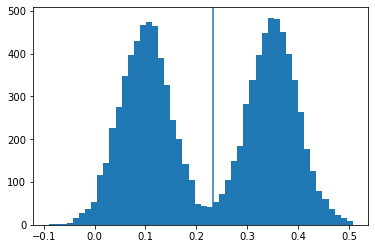

In [26]:
plt.hist(t, bins=50)
plt.axvline(sigmoid_torch(cutpoint0_torch))
plt.show()

In [34]:
X.shape

(10000, 5)

In [35]:
torch(0)

TypeError: 'module' object is not callable

In [37]:
torch.zeros(3, requires_grad=True)

tensor([0., 0., 0.], requires_grad=True)

In [41]:
torch.tensor(0., requires_grad=True)

tensor(0., requires_grad=True)

In [54]:
t_torch

tensor([0.0583, 0.3770, 0.1022,  ..., 0.1177, 0.3040, 0.1219],
       dtype=torch.float64)